# N Quuens completion problem
## author: Daniel Jarzymowski


# 1. Introduction

## 1.1 N Queens problem

The n queens problem involves answering the question of whether it is possible to place n queens on a chessboard of size NxN so that no queen can attack the others. Usually, two numbers of possible solutions are given: the number of basic solutions and the number of all solutions. This distinction is due to the fact that some settings are symmetrical about certain axes. Such solutions count towards all solutions, while they will be counted as one basic solution. After many trials, it was determined that the larger the size of the chessboard, the more possible solutions, except for chessboards with sizes from 2x2 to 6x6. For chessboards of size 2x2 and 3x3, there is no solution to the above problem. For chessboards measuring 4x4 and 6x6, there is only one basic solution. In contrast, a 5x5 chessboard has two basic solutions.

## 1.2 N Queens completion problem

An extension of the problem of setting up n queens is to complete them. Let's imagine that we have a chessboard of size NxN, on which k queens already stands, where k < N. Our goal is to determine whether it is possible to replenish the empty rows on the chessboard with queens, in such a way that none attack the others. Obviously, it can be seen that the number of the queens we can complete is N - k. Moreover, it is easy to be seen that some settings can reduce the number of basics solutions, or even make it impossible to complete the chessboard without conflict.

# 2. Preparation

Importing the necessary libraries

In [1]:
import pygad 
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

## 2.1 Inputs

In order to test the effectiveness of our solution for different inputs, I prepared 9 inputs: 3 small (chessboard 5x5), 3 medium (chessboard 8x8) and 3 lard (chessboard 15x15). I adopted the following designations: 1 is where the queen stands, 0 is an empty field.

### 2.1.1 Small inputs

5x5 chessboard has only two basic solutions. This means that the more queens stands on the chessboard to be completed, the greater the risk of limiting the number of solutions or even the nonexistence of solutions.

#### a) First small input

The first small input is a 5x5 chessboard with two queens. I have selected the queens setting in such a way that there is only one basic solution.

In [2]:
board_s1 = np.array(
        [[0, 0, 0, 0, 0],
         [1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0],
         [0, 0, 0, 0, 0]])
board_s1

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0]])

#### b) Second small input

The second small input is 5x5 chessboard, on which also two queens are placed. This setting has one basic solution.

In [3]:
board_s2 = np.array(
        [[1, 0, 0, 0, 0],
         [0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]])
board_s2

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

#### c) Third small input

The third small input is 5x5 chessboard with only one queen. This setting, just like previous chessboards, has only one basic solution.

In [4]:
board_s3 = np.array(
        [[0, 0, 1, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0]])
board_s3

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

### 2.1.2 Medium inputs

The 8x8 checkerboard has 12 basic solutions. Therefore, it is to be expected that the genetic algorithm should find different solutions. I selected the queens settings in all medium inputs in such a way that there is at least one basic solution.

#### a) First medium input

The first medium input is 8x8 chessboard with three queens.

In [5]:
board_m1 = np.zeros((8,8))
board_m1[0,4] = 1
board_m1[1,2] = 1
board_m1[3,5] = 1
board_m1

array([[0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

#### b) Second medium input

The second medium input is 8x8 chessboard with two queens already set on it.

In [6]:
board_m2 = np.zeros((8,8))
board_m2[0,5] = 1
board_m2[7,2] = 1
board_m2

array([[0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.]])

#### c) Third medium input

The third medium input is 8x8 chessboard with only one queen.

In [7]:
board_m3 = np.zeros((8,8))
board_m3[4,3] = 1
board_m3

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

### 2.1.3 Big inputs

I have taken a 15x15 checkerboard as a large input. Such a chessboard has 285,053 basic solutions. Here, too, I have selected the positioning of the queens in such a way that there is at least one solution.

#### a) First big input

The first large input is a 15x15 checkerboard with two queens.

In [8]:
board_b1 = np.zeros((15,15))
board_b1[7,3] = 1
board_b1[0,2] = 1
board_b1

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

#### b) Second big input

The second of the large inputs is a 15x15 checkerboard with only one queen.

In [9]:
board_b2 = np.zeros((15,15))
board_b2[10,7] = 1
board_b2

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

#### c) Third big input

The third large input, is a 15x15 checkerboard with as many as five queens.

In [10]:
board_b3 = np.zeros((15,15))
board_b3[0,3] = 1
board_b3[5,1] = 1
board_b3[2,12] = 1
board_b3[4,7] = 1
board_b3[14,0] = 1
board_b3

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.

# 3. Genetic algorithm - the first way

The first idea to solve this problem with genetic algorithms is to code chromosomes as an array with available rows and disallow duplicates in chromosomes. This approach allows avoiding checking conflicts in columns and rows, leaving only diagonals to be checked. This could make the execution time quite good. Let's find it out.

## 3.1 Fitness function and functions used in genetic algorithm

### 3.1.1 Fitness function

Inside the fitness function, I complete a copy of the drawn input using a list with available rows - avaible_rows and an array with available columns - solution. Then, using the threat_diagonal function, I calculate the number of threats on the entire checkerboard. Function return a negative fitness value, because the genetic algorithm looks for the maximum fitness value( in our case we want it to be zero).

In [11]:
def fitness(solution, solution_idx):
    b = board.copy()
    fitness = 0
    for row,col in zip(avaible_rows, solution):# filling the chessboard
            b[row, int(col)] = 2
    fitness += threat_diagonal(b) 
    return -fitness

### 3.1.2 Threat_diagonal function

When calculating the fitness of each solution, I use a function that collects all the diagonals of our chessboard, and then for each diagonal counts the number of threats that the queens located on the given diagonal generate for themselves. Finally, the number of all threats on the entire chessboard is returned. The function works for a completed chessboard, in which 2 stands for the queen we added, while the other marks as in the inputs.

In [12]:
def threat_diagonal(board):
    '''
    Function calculate number of threats on board by checking 
    diagonals of array.

    Parameters
    ----------
    board : numpy.ndarray
        NxN size array which conatins placement of queens

    Returns
    -------
    number_of_threats : int
        Numbers of possible attacks for all queens on board

    '''
    number_of_threats = 0
    diags = [board[::-1,:].diagonal(i) for i in range(-board.shape[0]+1,board.shape[1])] #*1
    diags.extend(board.diagonal(i) for i in range(board.shape[1]-1,-board.shape[0],-1)) # *2
    all_diag = [n.tolist() for n in diags] # converting arrys to lists
    to_check = [item for item in all_diag if 2 in item]# we take only those diagonals in which there is a 2
    for i in to_check:#*3
        if i.count(2) > 1:
            number_of_threats += (i.count(1) + i.count(2))*(i.count(1) + i.count(2) -1)
        else:
            number_of_threats += i.count(1)*2
    return number_of_threats

#### *1

I collect all the diagonals from the left bottom to the right top. To do this I use the expression "::-1,:", which reversed the order of the rows of the matrix(the effect of this expression is demonstrated below). Now I can use the diagonal function, which returns the diagonal from the left top to the right bottom. I start from the left, so the range for the dimension (x,y) should be set from -x+1 to y ascending. Such range seems to be strange, but as you can see on example below, the first diagonal from left is number 7 and this diagonal is 2 diagonals to the left from the main diagonal, so by setting range at -x+1 we start exactly form this bottom left diagonal. The diagonals thus collected formed a list of diags.

In [13]:
t = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
t, t[::-1,:]

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[7, 8, 9],
        [4, 5, 6],
        [1, 2, 3]]))

#### *2

I want to get (from the original matrix) all diagonals from left top to right bottom. I start from the right, so the range for the dimension (x,y) should be set from y-1 to -x+1 descending. After getting all the matrices, I add them to the list of diags.

#### *3

Counting the number of threats we consider two cases:

(a) when there is only one "2 "in the diagonal, in order to get the number of threats posed by each queen in that diagonal, I take the number of ones in that diagonal and multiply it times 2. Why does this work? Well, if there is only one "2" in the diagonal, then either it is the only queen there or there is a queen that was there from the beginning on the chessboard. If there is only an added queen in the diagonal, it poses no threat, and counting the number of occurrences of the one will give us zero, so as the number of threats we will get 0. On the other hand, if there is any queen in the diagonal in addition to the added queen, each queen threatens the other, so the total number of threats will equal the number of occurrences of 1 multiplied by 2.

b) when there is more than one queen added to the diagonal - in order to get the number of threats posed by all the queens in the diagonal, I count the number of queens in the diagonal and multiply by the number of queens minus 1, since each queen poses a threat to the others without counting herself. For example, if there are 3 queens on a diagonal, each queen poses a threat to two, making a total of 6 threats on that diagonal.

### 3.1.3 Cols_and_rows function

The function on input gets a chessboard with a certain number of queens. Next, using the argwhere function, it gets the location of the queens, from which all occupied rows and all occupied columns are then obtained. Then using the collection property, I create a list, with the available columns and rows, which the function returns.

In [14]:
def cols_and_rows(board):
    '''
    Function returns two list of empty columns and empty rows for 
    given board.
    

    Parameters
    ----------
    board : numpy.ndarray
        NxN size array which conatins placement of queens

    Returns
    -------
    avaible_cols : list
        List containing columns in which it is possible to place queen
    avaible_rows : list
        List containing rows in which it is possible to place queen

    '''
    places_taken = np.argwhere(board > 0)# getting locations of queens
    taken_cols = [row[1] for row in places_taken]# getting all occupied cols
    taken_rows = [col[0] for col in places_taken]# getting all occupied rows
    all_cols = [i for i in range(0, len(board))]
    all_rows = [i for i in range(0, len(board))]
    avaible_cols = list(set(all_cols) - set(taken_cols))# getting empty cols by substracting occupied cols from all cols
    avaible_rows = list(set(all_rows) - set(taken_rows))# getting empty rows by substracting occupied rows from all rows
    return avaible_cols, avaible_rows

### 3.1.4. Draw function

The function takes as x the letter indicating from which inputs we want to draw ('s'-small, 'm'-medium, 'b'- big) and returns a copy of the drawn chessboard.

In [15]:
def draw(x):
    '''
    Function draw selected random number and return this number of input from given type of input
    

    Parameters
    ----------
    x : string
        String indicating from which type of input board should be selected

    Returns
    -------
    numpy.ndarray
        Copy of selected board

    '''
    t = np.random.choice([1,2,3])# drawin grandom number, to indicate which input(first, second, third) should be selected
    if t == 1:
        if x == 's':
            return board_s1.copy()
        elif x == 'm':
            return board_m1.copy()
        else:
            return board_b1.copy()
    elif t == 2:
        if x == 's':
            return board_s2.copy()
        elif x == 'm':
            return board_m2.copy()
        else:
            return board_b2.copy()
    else:
        if x == 's':
            return board_s3.copy()
        elif x == 'm':
            return board_m3.copy()
        else:
            return board_b3.copy()

## 3.2 Hyperparameters of the genetic algorithm

After drawing for which input the algorithm will look for a solution, I call the cols_and_rows function to get free rows and columns on the chessboard. Then I define gene_space as a list with available columns. This ensures that the solution considers only those columns that are available, which, combined with setting the value of the "allow_duplicate_genes" hyperparameter to False, makes it impossible to have two queens in one column or row, so that only the diagonals are checked. I set the number of genes in the chromosomes to the number of queens that can be completed. I set the number of parents to cross as half the number of chromosomes in the population. On the other hand, the number of chromosomes in the population is the number of queens to be completed multiplied by a certain scalar ( for small inputs the scalar is 4, for medium inputs it is 5, while for big inputs it is 3). 

Parameters of the best solution : [0. 3. 1. 4.]
Fitness value of the best solution = 0


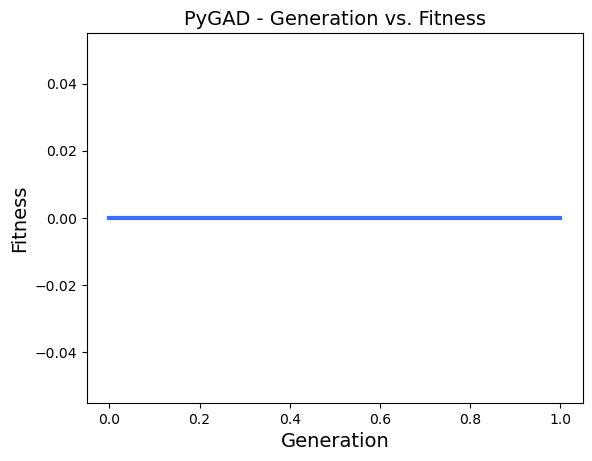

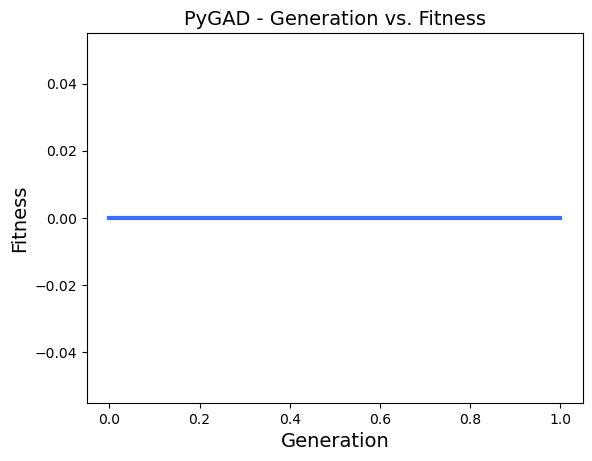

In [16]:
board = board_s3.copy()

avaible_cols, avaible_rows = cols_and_rows(board)

gene_space = avaible_cols# list with empty columns
fitness_function = fitness
#chromosoms in population
#number of genes in each chromosom       
sol_per_pop = len(gene_space)*4 #setting amounts of chromosomes as length of our gene_space multiplied by some scalar
num_genes = len(board) - np.count_nonzero(board > 0) # calculating how many queens could be set up

#how many parents we choose for mating
#how many generations 
#percentage of parents to keep
num_parents_mating = sol_per_pop//2 # geting half of population for mating
num_generations = 400
keep_parents = 2

#type of parents selection
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "rank"
        

#type of crossover
crossover_type = "two_points"

#type of mutation
#chance of mutation(%)
mutation_type = "swap"
#I add 5 to make sure the mutation percentage is high enough
mutation_percent_genes = 1/len(gene_space)*100 + 5

#I set stop criteria to 0, since my goal is to achieve 0 threats on board
stop_criteria = 'reach_0'

ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria = stop_criteria,
                       allow_duplicate_genes=False)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

ga_instance.plot_fitness()

## 3.3 Results and visualization on a chessboard for random inputs

### 3.3.1  Example of action and result for a 5x5 chessboard 

Parameters of the best solution : [2. 3. 4.]
Fitness value of the best solution = 0


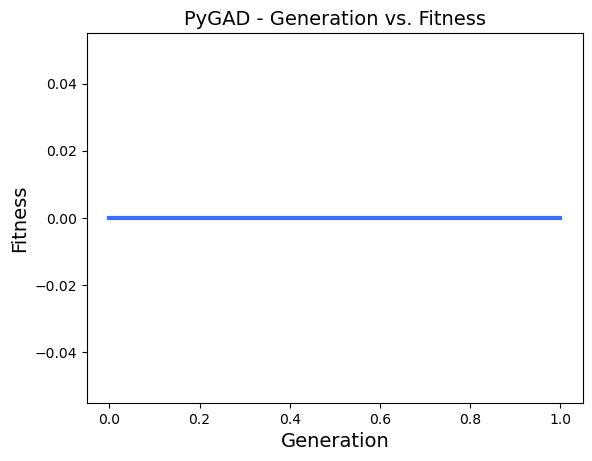

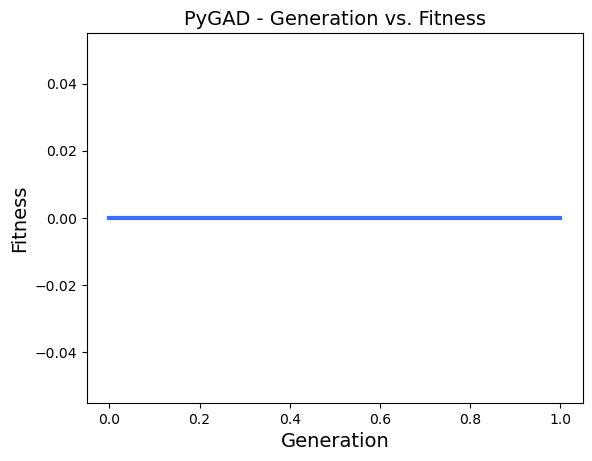

In [17]:
board = draw('s')
avaible_cols, avaible_rows = cols_and_rows(board)

gene_space = avaible_cols
fitness_function = fitness
      
sol_per_pop = len(gene_space)*4
num_genes = len(board) - np.count_nonzero(board > 0)

num_parents_mating = sol_per_pop//2
num_generations = 400
keep_parents = 2

parent_selection_type = "rank"
        
crossover_type = "two_points"

mutation_type = "swap"
mutation_percent_genes = 1/len(gene_space)*100 + 5

stop_criteria = 'reach_0'

ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria = stop_criteria,
                       allow_duplicate_genes=False)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

ga_instance.plot_fitness()

The genetic algorithm found a solution in the first generation. This is not so surprising when you consider that for small inputs the length of the chromosome will not be greater than 4, so by creating combinations of solutions to the base generation, the algorithm hits on the perfect one right away.

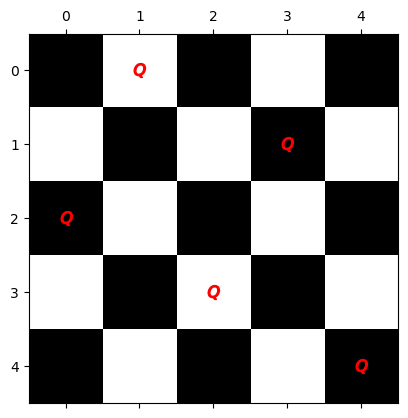

In [18]:
for row, col in zip(avaible_rows, solution): # filling chessboard according to solution which has been found
    board[row, int(col)] = 2
queens = np.argwhere(board > 0) # getting locations of queens
x = [queens[i][0] for i in range(0, len(queens))] # getting x locations of queens
y = [queens[i][1] for i in range(0, len(queens))] # getting y locations of queens
chess_board = np.zeros((len(board), len(board)), dtype=int)
chess_board[1::2, ::2] = 1 #start from the second row and going every second row insert 1 every second column
chess_board[::2, 1::2] = 1 #start from the second column and going every second column insert 1 every second row
fig, ax = plt.subplots()
# Drawing chessboard
ax.matshow(chess_board, cmap=plt.cm.gray) #1 - white, 0 - black
ax.scatter(x,y, marker='$Q$', color = 'red', s= 100)

### 3.3.2 Example of operation for a random 8x8 chessboard

Parameters of the best solution : [5. 2. 6. 1. 7. 0. 4.]
Fitness value of the best solution = 0


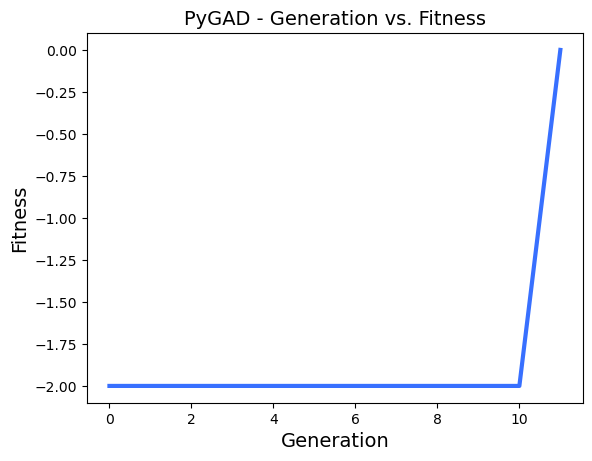

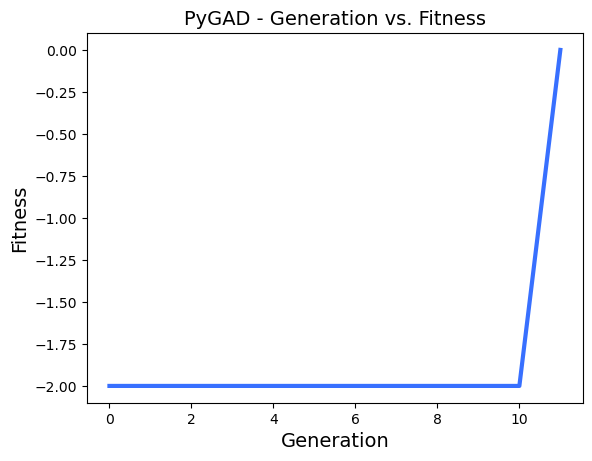

In [19]:
board = draw('m')

avaible_cols, avaible_rows = cols_and_rows(board)

gene_space = avaible_cols
fitness_function = fitness
      
sol_per_pop = len(gene_space)*5
num_genes = len(board) - np.count_nonzero(board > 0)

num_parents_mating = sol_per_pop//2
num_generations = 400
keep_parents = 2

parent_selection_type = "rank"

crossover_type = "two_points"

mutation_type = "swap"
mutation_percent_genes = 1/len(gene_space)*100 + 5

stop_criteria = 'reach_0'

ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria = stop_criteria,
                       allow_duplicate_genes=False)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

ga_instance.plot_fitness()

In this case, the genetic algorithm has found a solution very quickly. It is connected with the fact that chromosomes in this algorithm were rather short. And with short chromosomes and a population big enough, it doesn't take many generations for the genetic algorithm to find a perfect solution.

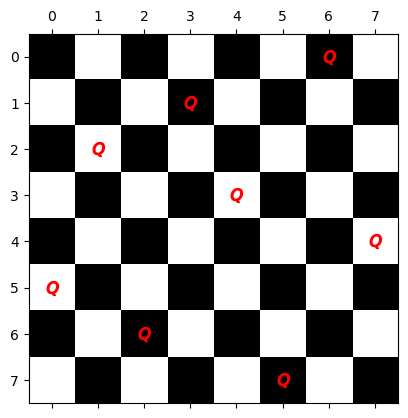

In [20]:
for row, col in zip(avaible_rows, solution):
    board[row, int(col)] = 2
queens = np.argwhere(board > 0)
x = [queens[i][0] for i in range(0, len(queens))]
y = [queens[i][1] for i in range(0, len(queens))]
chess_board = np.zeros((len(board), len(board)), dtype=int)
chess_board[1::2, ::2] = 1
chess_board[::2, 1::2] = 1
fig, ax = plt.subplots()
ax.matshow(chess_board, cmap=plt.cm.gray)
ax.scatter(x,y, marker='$Q$', color = 'red', s= 100)

### 3.3.3 Example of operation for a random 15x15 chessboard

Parameters of the best solution : [ 4. 11.  9.  3. 12. 10.  1. 13.  0.  5.  2. 14.  6.  8.]
Fitness value of the best solution = 0


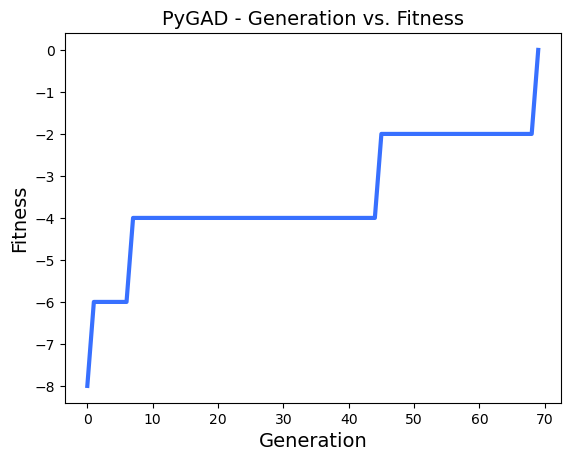

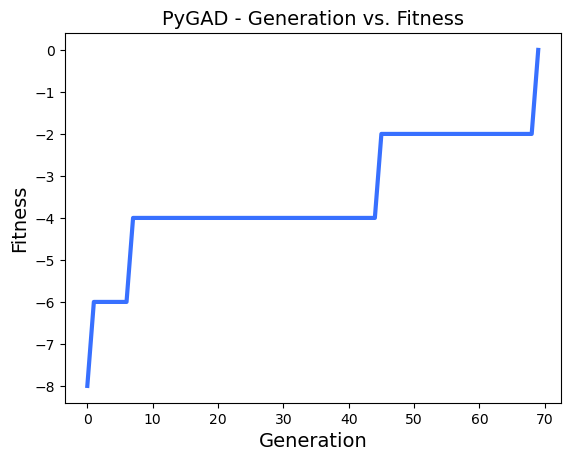

In [21]:
board = draw('b')

avaible_cols, avaible_rows = cols_and_rows(board)

gene_space = avaible_cols
fitness_function = fitness
      
sol_per_pop = len(gene_space)*3
num_genes = len(board) - np.count_nonzero(board > 0)

num_parents_mating = sol_per_pop//2
num_generations = 400
keep_parents = 2

parent_selection_type = "rank"

crossover_type = "two_points"

mutation_type = "swap"
mutation_percent_genes = 1/len(gene_space)*100 + 5

stop_criteria = 'reach_0'

ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria = stop_criteria,
                       allow_duplicate_genes=False)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

ga_instance.plot_fitness()

Even for big inputs, it doesn't take huge amount of generations to find a solution with such short chromosomes.

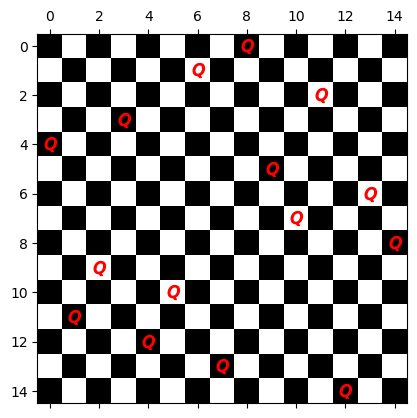

In [22]:
for row, col in zip(avaible_rows, solution):
    board[row, int(col)] = 2
queens = np.argwhere(board > 0)
x = [queens[i][0] for i in range(0, len(queens))]
y = [queens[i][1] for i in range(0, len(queens))]
chess_board = np.zeros((len(board), len(board)), dtype=int)
chess_board[1::2, ::2] = 1
chess_board[::2, 1::2] = 1
fig, ax = plt.subplots()
ax.matshow(chess_board, cmap=plt.cm.gray)
ax.scatter(x,y, marker='$Q$', color = 'red', s= 100)

# 4. Efficiency tests of the first version of the genetic algorithm

Genetic algorithm found solutions. However, some may wonder if it finds the perfect solution every time and how long it takes. To find out, I will run the algorithm a hundred times for each type of input and at the end I will calculate its average execution time and how many times it found the perfect solution.

## 4.1 Test for small inputs

In [23]:
mean_time_s_g1 = []
count_of_succes_s_g1 = 0
for i in range(0, 100):
    start = time.time()
    board = draw('s')
    avaible_cols, avaible_rows = cols_and_rows(board)

    gene_space = avaible_cols
    fitness_function = fitness
     
    sol_per_pop = len(gene_space)*4
    num_genes = len(board) - np.count_nonzero(board > 0)

    num_parents_mating = sol_per_pop//2
    num_generations = 400
    keep_parents = 2

    parent_selection_type = "rank"

    crossover_type = "two_points"

    mutation_type = "swap"
    mutation_percent_genes = 1/len(gene_space)*100 + 5

    stop_criteria = 'reach_0'

    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes,
                           stop_criteria = stop_criteria,
                           allow_duplicate_genes=False)

    ga_instance.run()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    end = time.time()
    mean_time_s_g1.append(end -start)
    if solution_fitness == 0: # checking if algorithm has found perfect solution
        count_of_succes_s_g1 +=1
print('Success(%): ' + str(count_of_succes_s_g1))
mean_time_s_g1 = np.array(mean_time_s_g1)
mean_s_g1 = np.mean(mean_time_s_g1)
print('Mean time: {mean}'.format(mean = mean_s_g1))

Success(%): 94
Mean time: 0.04129173517227173


## 4.2 Test for medium inputs

In [24]:
mean_time_m_g1 = []
count_of_succes_m_g1 = 0
for i in range(0, 100):
    start = time.time()
    board = draw('m')
    avaible_cols, avaible_rows = cols_and_rows(board)

    gene_space = avaible_cols
    fitness_function = fitness
         
    sol_per_pop = len(gene_space)*5
    num_genes = len(board) - np.count_nonzero(board > 0)

    num_parents_mating = sol_per_pop//2
    num_generations = 400
    keep_parents = 2

    parent_selection_type = "rank"

    crossover_type = "two_points"

    mutation_type = "swap"
    mutation_percent_genes = 1/len(gene_space)*100 + 5

    stop_criteria = 'reach_0'

    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes,
                           stop_criteria = stop_criteria,
                           allow_duplicate_genes=False)

    ga_instance.run()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    end = time.time()
    mean_time_m_g1.append(end -start)
    if solution_fitness == 0:
        count_of_succes_m_g1 +=1
print('Success(%): ' + str(count_of_succes_m_g1))
mean_time_m_g1 = np.array(mean_time_m_g1)
mean_m_g1 = np.mean(mean_time_m_g1)
print('Mean time: {mean}'.format(mean = mean_m_g1))

Success(%): 97
Mean time: 0.10968993186950683


## 4.3 Test for big inputs

In [25]:
mean_time_b_g1 = []
count_of_succes_b_g1 = 0
for i in range(0, 100):
    start = time.time()
    board = draw('d')
    avaible_cols, avaible_rows = cols_and_rows(board)

    gene_space = avaible_cols
    fitness_function = fitness
       
    sol_per_pop = len(gene_space)*3
    num_genes = len(board) - np.count_nonzero(board > 0)

    num_parents_mating = sol_per_pop//2
    num_generations = 400
    keep_parents = 2

    parent_selection_type = "rank"

    crossover_type = "two_points"

    mutation_type = "swap"
    mutation_percent_genes = 1/len(gene_space)*100 + 5

    stop_criteria = 'reach_0'

    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes,
                           stop_criteria = stop_criteria,
                           allow_duplicate_genes=False)

    ga_instance.run()


    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    end = time.time()
    mean_time_b_g1.append(end -start)
    if solution_fitness == 0:
        count_of_succes_b_g1 +=1
print('Success(%): ' + str(count_of_succes_b_g1))
mean_time_b_g1 = np.array(mean_time_b_g1)
mean_b_g1 = np.mean(mean_time_b_g1)
print('Mean time: {mean}'.format(mean = mean_b_g1))

Success(%): 87
Mean time: 2.278685500621796


# 5. Summary of testing of the first version of the genetic algorithm

In [26]:
index = ['small_g1', 'medium_g1', 'big_g1']
lst = [[count_of_succes_s_g1, mean_s_g1],
       [count_of_succes_m_g1, mean_m_g1],
       [count_of_succes_b_g1, mean_b_g1]]
df = pd.DataFrame(lst, index=index, columns=['Success(%)','Mean time'])
df

,Success(%),Mean time
small_g1,94,0.041292
medium_g1,97,0.109690
big_g1,87,2.278686


Text(0.5, 1.0, 'Mean time')

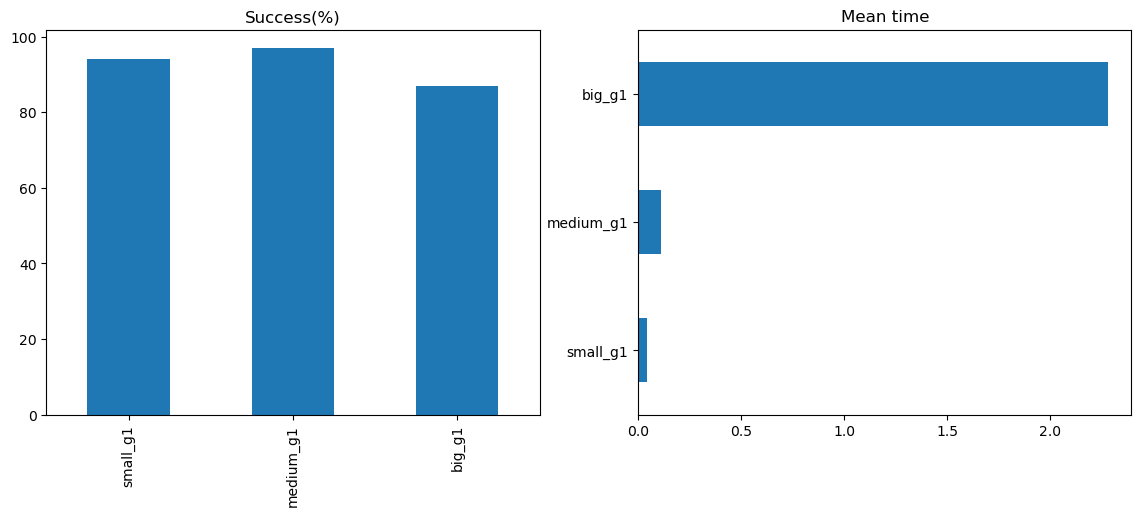

In [27]:
fig, ax = plt.subplots(1,2, figsize = (14,5))
df['Success(%)'].plot(kind = 'bar', ax=ax[0]).set_title('Success(%)')
df['Mean time'].plot(kind = 'barh', ax=ax[1]).set_title('Mean time')

From the graphs and table, it can be seen that for small and medium inputs, the efficiency of the genetic algorithm is very high. For large inputs, the efficiency oscillates around 80%, which is also not a bad result. What is striking, however, is the significant differences in average execution time. This is not so surprising if we consider that for larger inputs each operation takes longer, since there are more diagonals to check. To sum it up, this algorithm works quite well, as it has good score and execution time for each type of input.

# 6. Genetic algorithm - the second way

## 6.1 Fitness fuction

The second idea to solve n queens completion problem is to code our chromosome as an array containing only 0 and 1, where 1 is indicating to set up queen on this location. To do so, I get the available columns and rows, just as in the first genetic algorithm, but next I create a list "empty_places" which contains tuples with the location of each empty place in which a queen can be set up. Next, after completing the chessboard, for every queen I check threats in row, column and all for diagonals. I set up non_threat variable as the amount of queens that should be on board multiplied by that amount decreased by one, as in perfect placement, each queen should not be attacking every other queen. Then for each threat seen, I decrease the number of queens, which aren't attacked by one (variable non_threat). 

In [28]:
def fitness_2(solution, solution_idx):
    b = board.copy()
    non_threat = len(b)*(len(b)-1)
    for i in range(len(empty_places)):
        b[empty_places[i][0], empty_places[i][1]] = solution[i]
    queens = np.argwhere(b > 0)
    if len(queens) != len(b):
        non_threat -= 100
    for q in queens:
        x = q[0]
        y = q[1]
        # checking row
        for c in range(-y, len(b) - y):
            if c != 0  and b[x, y + c] == 1:
                non_threat -= 1
        # checking column
        for r in range(-x, len(b) - x):
            if r != 0 and b[x + r, y] == 1:
                non_threat -= 1
        # checking diagonals
        # diagonal right down
        d1 = 1
        while(x + d1 < len(b) and y + d1 < len(b)):
            if b[x + d1, y + d1] == 1:
                non_threat -= 1
            d1 += 1
        # diagonal right up
        d2 = 1
        while(x - d2 > 0 and y + d2 < len(b)):
            if b[x - d2, y + d2] == 1:
                non_threat -= 1
            d2 += 1
        # diagonal left down
        d3 = 1
        while(x + d3 < len(b) and y - d3 > 0):
            if b[ x + d3, y- d3] == 1:
                non_threat -= 1
            d3 += 1
        # diagonal left up
        d4 = 1
        while(x - d4 >0 and y - d4 > 0):
            if b[x - d4, y - d4] == 1:
                non_threat -= 1
            d4 +=1
    return non_threat

## 6.2 Hyperparameters of the genetic algorithm

I set length of chromosomes as length of list with empty places on board. The amount of chromosome in each generation is set as length of list with empty places multiplied by some scalar (small inputs: 4, medium inputs: 1/4, big inputs: 1/16). Number of parents for mating is set as a half of the amount of chromosomes in generation. Stop criteria are set different for each type of input (small:20, medium:56, big:210). Such numbers are connected with the way I code variable non_threat in fitness.

Parameters of the best solution : [1. 0. 0. 0. 0. 1. 0. 1. 0.]
Fitness value of the best solution = 20


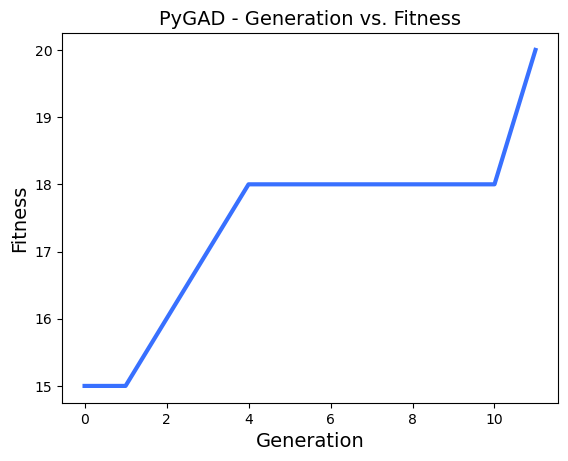

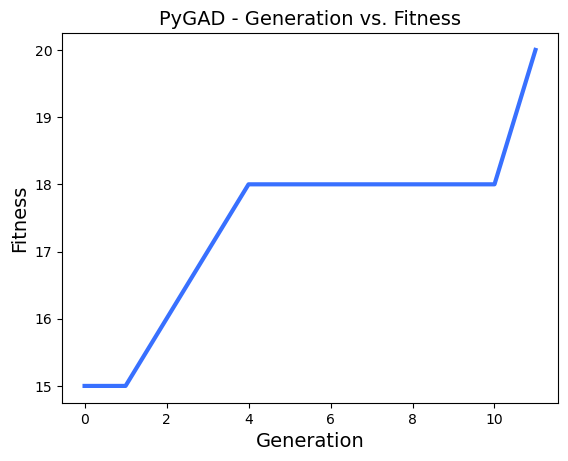

In [29]:
board = board_s2.copy()
empty_places = []
avaible_cols, avaible_rows = cols_and_rows(board)
for i in avaible_rows:
    for j in avaible_cols:
        if board[i,j] != 1:
            empty_places.append((i,j))

gene_space = [0,1]
fitness_function = fitness_2
      
sol_per_pop = len(empty_places)*4
num_genes = len(empty_places)

num_parents_mating = sol_per_pop//2
num_generations = 400
keep_parents = 2

parent_selection_type = "sss"
        
crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 1/len(empty_places)*100 + 5

stop_criteria = 'reach_20'

ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria = stop_criteria)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

ga_instance.plot_fitness()

## 6.3 Results and visualization on a chessboard for random inputs

### 6.3.1 Example of action and result for a 5x5 chessboard 

Parameters of the best solution : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
Fitness value of the best solution = 20


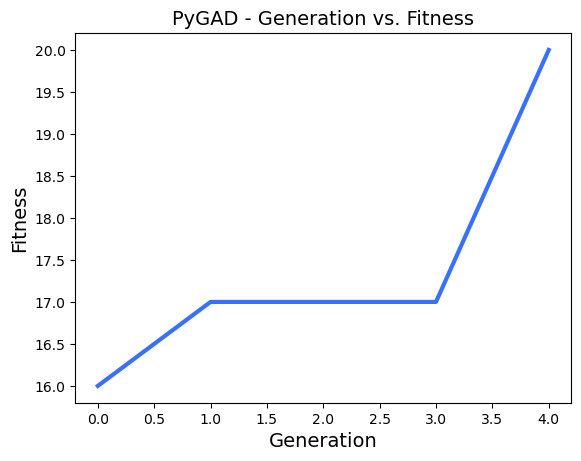

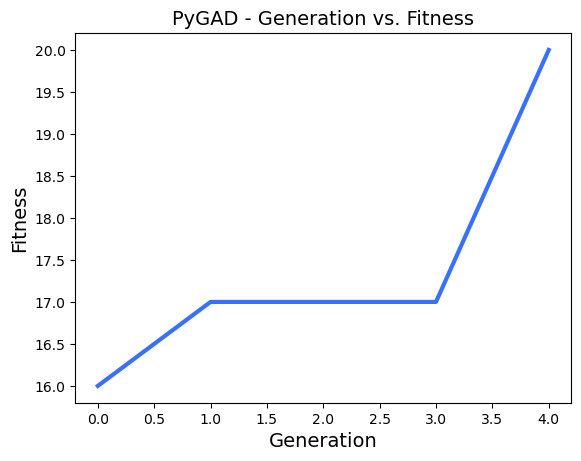

In [30]:
board = draw('s')
empty_places = []
avaible_cols, avaible_rows = cols_and_rows(board)
for i in avaible_rows:
    for j in avaible_cols:
        if board[i,j] != 1:
            empty_places.append((i,j))

gene_space = [0,1]
fitness_function = fitness_2
      
sol_per_pop = len(empty_places)*4
num_genes = len(empty_places)

num_parents_mating = sol_per_pop//2
num_generations = 400
keep_parents = 2

parent_selection_type = "sss"
        
crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 1/len(empty_places)*100 + 5

stop_criteria = 'reach_20'

ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria = stop_criteria)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

ga_instance.plot_fitness()

Algorithm seems to be finding perfect solution every time. It will be verified later in test.

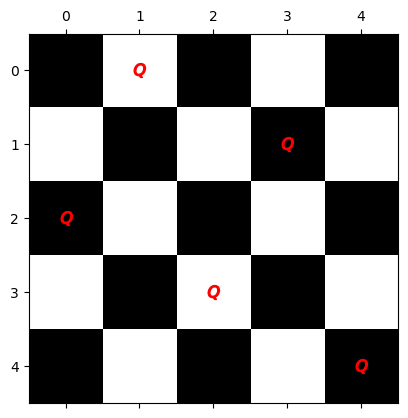

In [31]:
for i in range(len(empty_places)):
    board[empty_places[i][0], empty_places[i][1]] = solution[i]
queens = np.argwhere(board > 0)
x = [queens[i][0] for i in range(0, len(queens))]
y = [queens[i][1] for i in range(0, len(queens))]
chess_board = np.zeros((len(board), len(board)), dtype=int)
chess_board[1::2, ::2] = 1 
chess_board[::2, 1::2] = 1
fig, ax = plt.subplots()
# Rysowanie szachownicy 
ax.matshow(chess_board, cmap=plt.cm.gray)
ax.scatter(x,y, marker='$Q$', color = 'red', s= 100)

### 6.3.2 Example of action and result for a 8x8 chessboard 

Parameters of the best solution : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
Fitness value of the best solution = 54


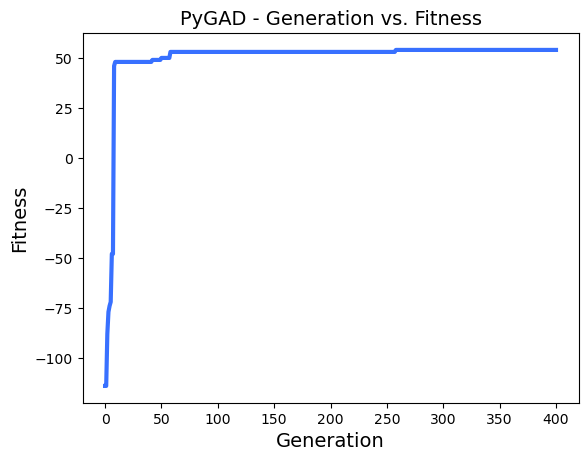

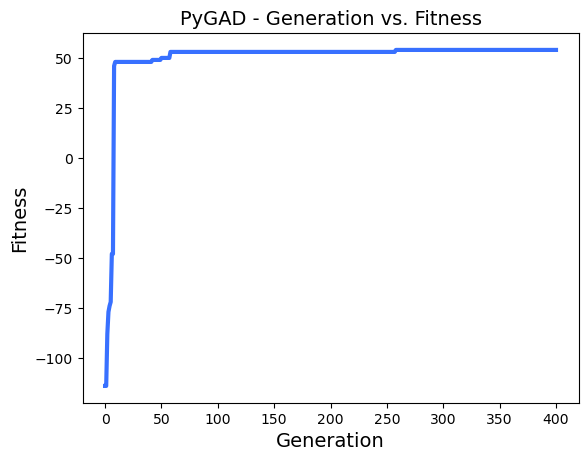

In [32]:
board = draw('m')
empty_places = []
avaible_cols, avaible_rows = cols_and_rows(board)
for i in avaible_rows:
    for j in avaible_cols:
        if board[i,j] != 1:
            empty_places.append((i,j))

gene_space = [0,1]
fitness_function = fitness_2
      
sol_per_pop = len(empty_places)//4
num_genes = len(empty_places)

num_parents_mating = sol_per_pop//2
num_generations = 400
keep_parents = 3

parent_selection_type = "rank"
        
crossover_type = "two_points"

mutation_type = "random"
mutation_percent_genes = 1/len(empty_places)*100 + 5

stop_criteria = 'reach_56'

ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria = stop_criteria)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

ga_instance.plot_fitness()

The algorithm is quite near the perfect solution, but is unable to reach it. In summary, I will describe why it happens this way.

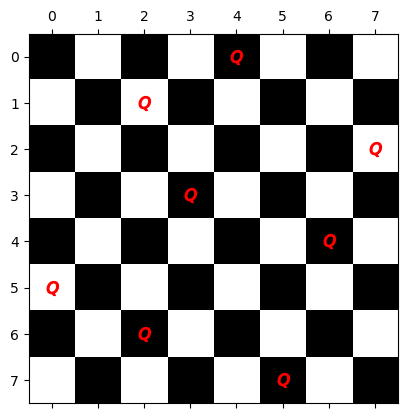

In [33]:
for i in range(len(empty_places)):
    board[empty_places[i][0], empty_places[i][1]] = solution[i]
queens = np.argwhere(board > 0)
x = [queens[i][0] for i in range(0, len(queens))]
y = [queens[i][1] for i in range(0, len(queens))]
chess_board = np.zeros((len(board), len(board)), dtype=int)
chess_board[1::2, ::2] = 1 
chess_board[::2, 1::2] = 1
fig, ax = plt.subplots()
ax.matshow(chess_board, cmap=plt.cm.gray) 
ax.scatter(x,y, marker='$Q$', color = 'red', s= 100)

### 6.3.3 Example of action and result for a 15x15 chessboard 

Parameters of the best solution : [0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0.]
Fitness value of the best solution = 6


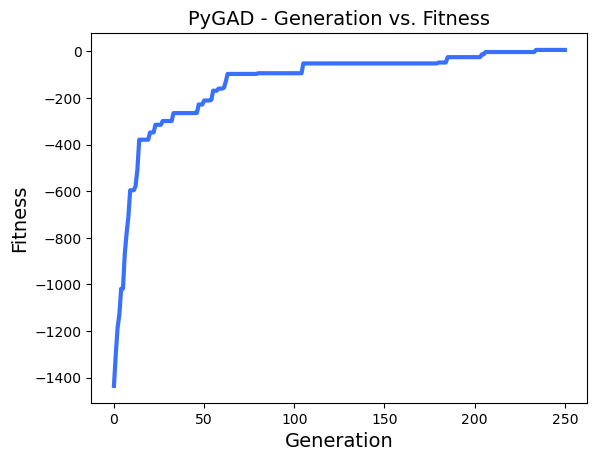

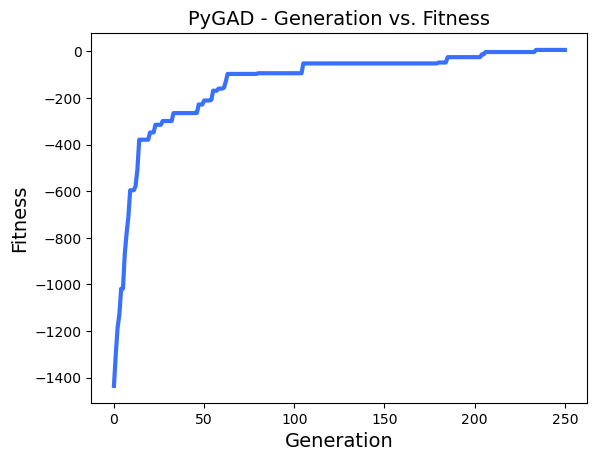

In [34]:
board = draw('b')
empty_places = []
avaible_cols, avaible_rows = cols_and_rows(board)
for i in avaible_rows:
    for j in avaible_cols:
        if board[i,j] != 1:
            empty_places.append((i,j))

gene_space = [0,1]
fitness_function = fitness_2
      
sol_per_pop = len(empty_places)//16
num_genes = len(empty_places)

num_parents_mating = sol_per_pop//6
num_generations = 250
keep_parents = 1

parent_selection_type = "sss"
        
crossover_type = "two_points"

mutation_type = "random"
mutation_percent_genes = 1/len(empty_places)*100 + 5

stop_criteria = 'reach_210'

ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria = stop_criteria)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

ga_instance.plot_fitness()

In this case, the algorithm is far from perfect solution. Such bad results could be connected with the fact, that I had to drastically decrease population in each generation, so the algorithm's execution time won't be higher than 8 second. Even this 8 seconds is not a good time.

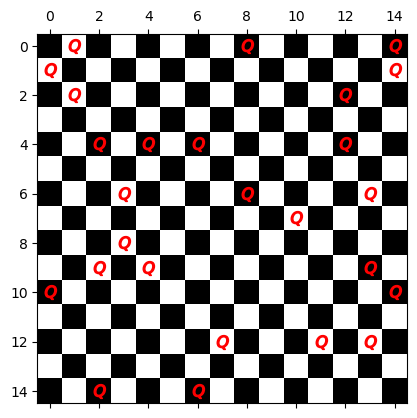

In [35]:
for i in range(len(empty_places)):
    board[empty_places[i][0], empty_places[i][1]] = solution[i]
queens = np.argwhere(board > 0)
x = [queens[i][0] for i in range(0, len(queens))]
y = [queens[i][1] for i in range(0, len(queens))]
chess_board = np.zeros((len(board), len(board)), dtype=int)
chess_board[1::2, ::2] = 1 
chess_board[::2, 1::2] = 1 
fig, ax = plt.subplots()
ax.matshow(chess_board, cmap=plt.cm.gray)
ax.scatter(x,y, marker='$Q$', color = 'red', s= 100)

# 7. Efficiency tests of the second version of the genetic algorithm

Just as for the first type of algorithm, I will run the test to check efficiency and mean execution time of the second algorithms for all types of inputs. 

## 7.1 Test for small inputs

In [36]:
mean_time_s_g2 = []
count_of_succes_s_g2 = 0
for i in range(0, 100):
    start = time.time()
    board = draw('s')
    empty_places = []
    avaible_cols, avaible_rows = cols_and_rows(board)
    for i in avaible_rows:
        for j in avaible_cols:
            if board[i,j] != 1:
                empty_places.append((i,j))

    gene_space = [0,1]
    fitness_function = fitness_2

    sol_per_pop = len(empty_places)*4
    num_genes = len(empty_places)

    num_parents_mating = sol_per_pop//2
    num_generations = 400
    keep_parents = 2

    parent_selection_type = "sss"

    crossover_type = "single_point"

    mutation_type = "random"
    mutation_percent_genes = 1/len(empty_places)*100 + 5

    stop_criteria = 'reach_20'

    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes,
                           stop_criteria = stop_criteria)

    ga_instance.run()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    end = time.time()
    mean_time_s_g2.append(end -start)
    if solution_fitness == 20:
        count_of_succes_s_g2 +=1
print('Success(%): ' + str(count_of_succes_s_g2))
mean_time_s_g2 = np.array(mean_time_s_g2)
mean_s_g2 = np.mean(mean_time_s_g2)
print('Mean time: {mean}'.format(mean = mean_s_g2))

Success(%): 100
Mean time: 0.13233518838882447


## 7.2 Test for medium input

In [37]:
mean_time_m_g2 = []
count_of_succes_m_g2 = 0
for i in range(0, 100):
    start = time.time()
    board = draw('m')
    empty_places = []
    avaible_cols, avaible_rows = cols_and_rows(board)
    for i in avaible_rows:
        for j in avaible_cols:
            if board[i,j] != 1:
                empty_places.append((i,j))

    gene_space = [0,1]
    fitness_function = fitness_2

    sol_per_pop = len(empty_places)//4
    num_genes = len(empty_places)

    num_parents_mating = sol_per_pop//2
    num_generations = 400
    keep_parents = 3

    parent_selection_type = "rank"

    crossover_type = "two_points"

    mutation_type = "random"
    mutation_percent_genes = 1/len(empty_places)*100 + 5

    stop_criteria = 'reach_56'

    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes,
                           stop_criteria = stop_criteria)

    ga_instance.run()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    end = time.time()
    mean_time_m_g2.append(end -start)
    if solution_fitness == 56:
        count_of_succes_m_g2 +=1
print('Success(%): ' + str(count_of_succes_m_g2))
mean_time_m_g2 = np.array(mean_time_m_g2)
mean_m_g2 = np.mean(mean_time_m_g2)
print('Mean time: {mean}'.format(mean = mean_m_g2))

Success(%): 8
Mean time: 1.5953728699684142


## 7.3 Test for big input

In [38]:
mean_time_b_g2 = []
count_of_succes_b_g2 = 0
for i in range(0, 100):
    start = time.time() 
    board = draw('b')
    empty_places = []
    avaible_cols, avaible_rows = cols_and_rows(board)
    for i in avaible_rows:
        for j in avaible_cols:
            if board[i,j] != 1:
                empty_places.append((i,j))

    gene_space = [0,1]
    fitness_function = fitness_2

    sol_per_pop = len(empty_places)//16
    num_genes = len(empty_places)

    num_parents_mating = sol_per_pop//5
    num_generations = 300
    keep_parents = 1

    parent_selection_type = "sss"

    crossover_type = "two_points"

    mutation_type = "random"
    mutation_percent_genes = 1/len(empty_places)*100 + 5

    stop_criteria = 'reach_210'

    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness_function,
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes,
                           stop_criteria = stop_criteria)

    ga_instance.run()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    end = time.time()
    mean_time_b_g2.append(end -start)
    if solution_fitness == 56:
        count_of_succes_b_g2 +=1
print('Success(%): ' + str(count_of_succes_b_g2))
mean_time_b_g2 = np.array(mean_time_b_g2)
mean_b_g2 = np.mean(mean_time_b_g2)
print('Mean time: {mean}'.format(mean = mean_b_g2))

Success(%): 0
Mean time: 7.370042016506195


# 8. Summary of test for second genetic algorithm

In [39]:
index = ['small_g2', 'medium_g2', 'big_g2']
lst = [[count_of_succes_s_g2, mean_s_g2],
       [count_of_succes_m_g2, mean_m_g2],
       [count_of_succes_b_g2, mean_b_g2]]
df1 = pd.DataFrame(lst, index=index, columns=['Success(%)','Mean time'])
df1

,Success(%),Mean time
small_g2,100,0.132335
medium_g2,8,1.595373
big_g2,0,7.370042


Text(0.5, 1.0, 'Mean time')

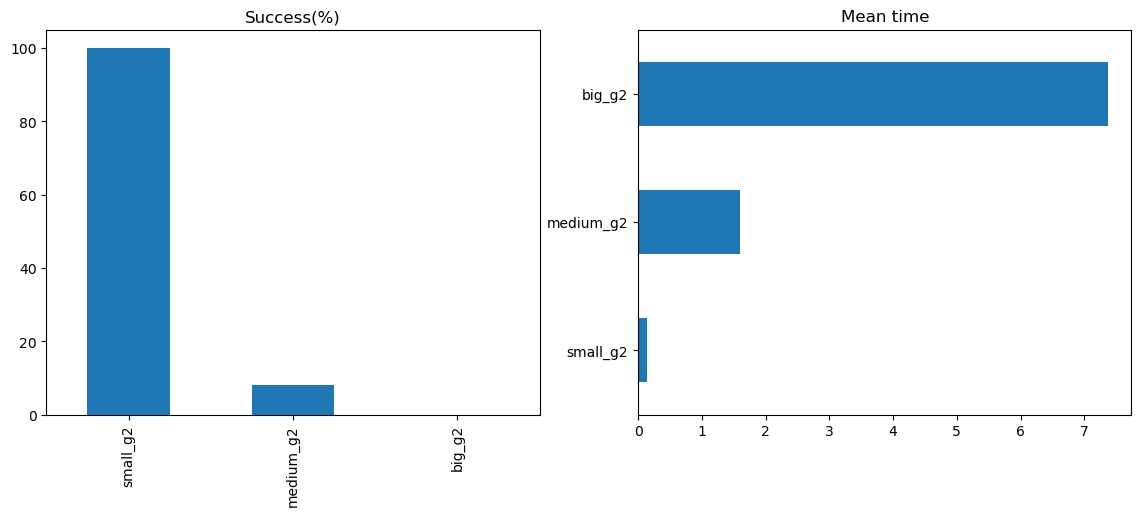

In [40]:
fig, ax = plt.subplots(1,2, figsize = (14,5))
df1['Success(%)'].plot(kind = 'bar', ax=ax[0]).set_title('Success(%)')
df1['Mean time'].plot(kind = 'barh', ax=ax[1]).set_title('Mean time')

For small inputs this genetic algorithm seems to be working perfectly, but for the other type of inputs not so good. What is more, the execution time for medium and big inputs would be much longer if I hadn't reduced the populations. To sum it up, this algorithm requires a lot of time for its operation and even then it struggles it find perfect solution for inputs that are not small. These facts make this algorithm not worth using.

# 9. Project summary

In [41]:
result = pd.concat([df, df1])
result

,Success(%),Mean time
small_g1,94,0.041292
medium_g1,97,0.109690
big_g1,87,2.278686
small_g2,100,0.132335
medium_g2,8,1.595373
big_g2,0,7.370042


Here, there is comparison of result and time of execution for each type of input for two genetic algorithms. I assume, that if I would set population high enough for medium and big inputs results could be similar to result of first approach, but time of execution would be horrible. In my opinion, the first approach is much better, as it works fine for each type of inputs and takes much less time to find a perfect solution. If I had to solve such problem for even bigger chessboards, I would definitely select the first algorithm.